In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
master=pd.read_csv("master.csv")
master.head(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X


In [3]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
#remove HDI column

In [5]:
suicide=master.copy()
suicide=suicide.drop("HDI for year",axis=1)
suicide.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [6]:
#fixing column name

suicide=suicide.rename(columns={" gdp_for_year ($) ":"gdp_for_year($)"})
suicide.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'gdp_for_year($)',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [89]:
# What is the year range used in this dataset?

max(suicide["year"]),min(suicide["year"])

(2016, 1985)

#### Is every country presented in this data set between the same years?

In [8]:
suicide["country"].value_counts().head(10)

Mauritius         382
Netherlands       382
Austria           382
Iceland           382
United Kingdom    372
Luxembourg        372
Italy             372
Chile             372
Ecuador           372
Brazil            372
Name: country, dtype: int64

In [9]:
suicide["country"].value_counts().tail(10)

Nicaragua                 72
United Arab Emirates      72
Oman                      36
Saint Kitts and Nevis     36
San Marino                36
Bosnia and Herzegovina    24
Cabo Verde                12
Dominica                  12
Macau                     12
Mongolia                  10
Name: country, dtype: int64

So year range of each country did not start from 1985. Let's pick two countries to check:

In [10]:
suicide[suicide["country"]=="Turkey"]["year"]

25636    2009
25637    2009
25638    2009
25639    2009
25640    2009
         ... 
25715    2015
25716    2015
25717    2015
25718    2015
25719    2015
Name: year, Length: 84, dtype: int64

In [11]:
suicide[suicide["country"]=="United States"]["year"]

26848    1985
26849    1985
26850    1985
26851    1985
26852    1985
         ... 
27215    2015
27216    2015
27217    2015
27218    2015
27219    2015
Name: year, Length: 372, dtype: int64

In [12]:
suicide["year"].value_counts().sort_index()

1985     576
1986     576
1987     648
1988     588
1989     624
1990     768
1991     768
1992     780
1993     780
1994     816
1995     936
1996     924
1997     924
1998     948
1999     996
2000    1032
2001    1056
2002    1032
2003    1032
2004    1008
2005    1008
2006    1020
2007    1032
2008    1020
2009    1068
2010    1056
2011    1032
2012     972
2013     960
2014     936
2015     744
2016     160
Name: year, dtype: int64

We presume there was an irregular collection/entrance of data regarding to this topic. So we continue to analyse the dataset of between 2000 and 2011 due to that the number of entries look similar.

In [13]:
suicide_new = (suicide["year"] >= 2000) & (suicide["year"] <= 2011)
suicide_final=suicide[suicide_new]
suicide_final["year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011], dtype=int64)

Now we can work on!

### Which age group has the highest number of suicides?

In [14]:
suicide_final["age"].value_counts()

25-34 years    2066
5-14 years     2066
35-54 years    2066
75+ years      2066
15-24 years    2066
55-74 years    2066
Name: age, dtype: int64

In [15]:
suicide_age=suicide_final[["age","suicides_no"]]
suicide_age_groups=suicide_age.groupby("age")["suicides_no"].sum()
suicide_age_groups=suicide_age_groups.reset_index("age")
suicide_age_groups

,age,suicides_no
0,15-24 years,348379
1,25-34 years,468691
2,35-54 years,1095753
3,5-14 years,22250
4,55-74 years,704927
5,75+ years,274783


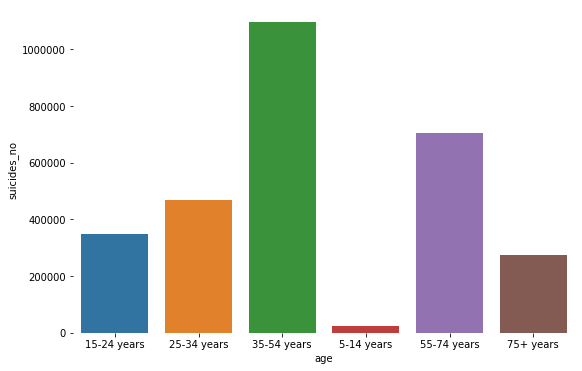

In [16]:
fig=plt.figure(figsize=(9,6))
sns.barplot(x="age",y="suicides_no",data=suicide_age_groups)
sns.despine(left=True,bottom=True)

This graph shows that people aged 35 to 54 committed suicide more than other age groups.

### Which gender has higher suicide numbers in selected years?

In [17]:
suicide_gender=suicide_final[["year","sex","suicides_no"]]
suicide_gender=suicide_gender.groupby(["year","sex"])["suicides_no"].sum()
suicide_gender=suicide_gender.reset_index(["year","sex"])
suicide_gender

,year,sex,suicides_no
0,2000,female,55254
1,2000,male,200578
2,2001,female,52999
3,2001,male,197653
4,2002,female,55549
5,2002,male,200546
6,2003,female,55627
7,2003,male,200452
8,2004,female,53232
9,2004,male,187629


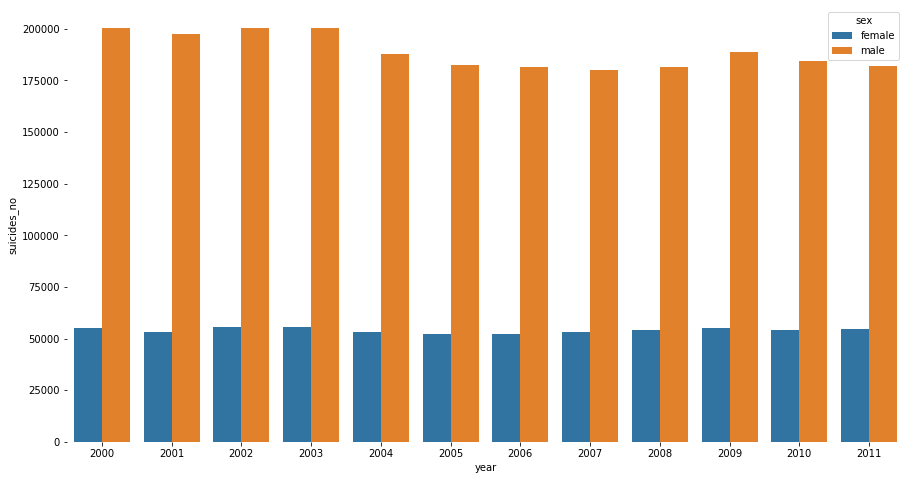

In [18]:
fig=plt.figure(figsize=(15,8))
sns.barplot(x="year",y="suicides_no",data=suicide_gender,hue="sex")
sns.despine(bottom=True,left=True)
plt.show()

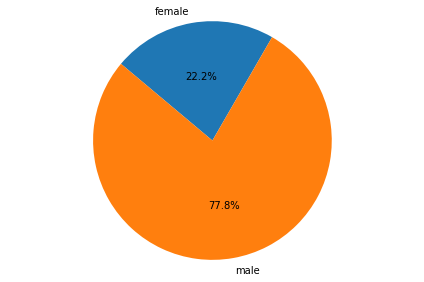

In [19]:
suicide_total=suicide_gender[["sex","suicides_no"]]
suicide_total=suicide_total.groupby("sex")["suicides_no"].sum()
suicide_total=suicide_total.reset_index("sex")

plt.pie(suicide_total["suicides_no"],labels=suicide_total["sex"],autopct='%1.1f%%',startangle=60, pctdistance=0.55)

plt.axis('equal')  
plt.tight_layout()
plt.show()

### Which country has the highest percentage of men/women suicide numbers?

In [20]:
suicide_country=suicide_final[["country","sex","suicides_no"]]
suicide_f=suicide_country[suicide_country["sex"]=="female"]
suicide_fe=suicide_f[["country","suicides_no"]]
suicide_fe=suicide_fe.groupby("country")["suicides_no"].sum()
suicide_fe=suicide_fe.reset_index("country")
suicide_fe=suicide_fe.rename(columns={"suicides_no":"female_suicide"})
suicide_fe

,country,female_suicide
0,Albania,344
1,Antigua and Barbuda,0
2,Argentina,7487
3,Armenia,148
4,Aruba,17
...,...,...
92,United Arab Emirates,98
93,United Kingdom,11427
94,United States,84134
95,Uruguay,1302


In [21]:
suicide_country=suicide_final[["country","sex","suicides_no"]]
suicide_m=suicide_country[suicide_country["sex"]=="male"]
suicide_ma=suicide_m[["country","suicides_no"]]
suicide_ma=suicide_ma.groupby("country")["suicides_no"].sum()
suicide_ma=suicide_ma.reset_index("country")
suicide_ma=suicide_ma.rename(columns={"suicides_no":"male_suicide"})
suicide_ma

,country,male_suicide
0,Albania,612
1,Antigua and Barbuda,8
2,Argentina,28901
3,Armenia,511
4,Aruba,67
...,...,...
92,United Arab Emirates,524
93,United Kingdom,38422
94,United States,322683
95,Uruguay,4665


In [22]:
gender_suicide=suicide_fe.merge(suicide_ma)
gender_suicide["total"]=gender_suicide["female_suicide"] + gender_suicide["male_suicide"]
gender_suicide["female_%"]=round(gender_suicide["female_suicide"] / gender_suicide["total"],2)
gender_suicide["male_%"]=round(gender_suicide["male_suicide"] / gender_suicide["total"],2)
gender_suicide

,country,female_suicide,male_suicide,total,female_%,male_%
0,Albania,344,612,956,0.36,0.64
1,Antigua and Barbuda,0,8,8,0.00,1.00
2,Argentina,7487,28901,36388,0.21,0.79
3,Armenia,148,511,659,0.22,0.78
4,Aruba,17,67,84,0.20,0.80
...,...,...,...,...,...,...
92,United Arab Emirates,98,524,622,0.16,0.84
93,United Kingdom,11427,38422,49849,0.23,0.77
94,United States,84134,322683,406817,0.21,0.79
95,Uruguay,1302,4665,5967,0.22,0.78


In [91]:
# Which country/countries has/have the highest female suicide percentage?
gender_suicide["female_%"].max()

0.36

In [24]:
gender_suicide[gender_suicide["female_%"]==0.36]

,country,female_suicide,male_suicide,total,female_%,male_%
0,Albania,344,612,956,0.36,0.64
78,Singapore,1425,2496,3921,0.36,0.64


In [92]:
# Which country/countries has/have the highest male suicide percentage?
gender_suicide["male_%"].max()

1.0

In [26]:
gender_suicide[gender_suicide["male_%"]==1]

,country,female_suicide,male_suicide,total,female_%,male_%
1,Antigua and Barbuda,0,8,8,0.0,1.0
14,Bosnia and Herzegovina,0,5,5,0.0,1.0
62,Oman,0,26,26,0.0,1.0
75,San Marino,0,2,2,0.0,1.0


In [27]:
gender_suicide["female_suicide"].max()

102297

In [93]:
# Which country has the highest female suicide number?
gender_suicide[gender_suicide["female_suicide"]==102297]

,country,female_suicide,male_suicide,total,female_%,male_%
45,Japan,102297,258030,360327,0.28,0.72


In [94]:
# Which country has the highest male suicide number?
gender_suicide["male_suicide"].max()

448101

In [30]:
gender_suicide[gender_suicide["male_suicide"]==448101]

,country,female_suicide,male_suicide,total,female_%,male_%
72,Russian Federation,90619,448101,538720,0.17,0.83


### Which generation group has the highest suicide numbers?

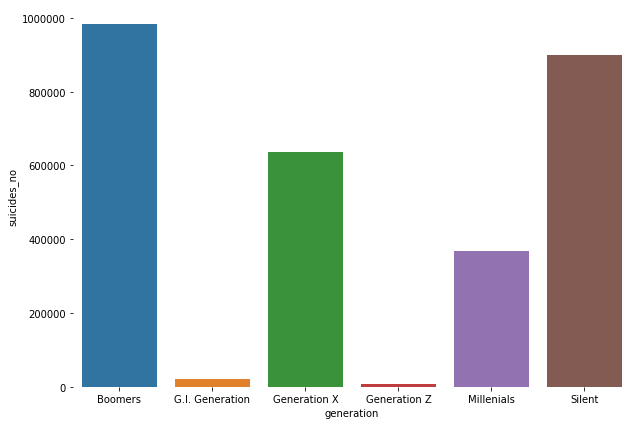

In [38]:
suicide_gen=suicide_final[["generation","suicides_no"]]
suicide_gen=suicide_gen.groupby("generation")["suicides_no"].sum()
suicide_gen=suicide_gen.reset_index("generation")

fig=plt.figure(figsize=(10,7))
sns.barplot(x="generation",y="suicides_no",data=suicide_gen)
sns.despine(bottom=True,left=True)
plt.show()

### Is there a positive correlation between GDP per capita and Suicide Numbers for selected years?

In [40]:
corr=suicide_final[["country","suicides_no","gdp_per_capita ($)"]]
corr=corr.groupby(["country","gdp_per_capita ($)"])["suicides_no"].sum()
corr=corr.reset_index(["country","gdp_per_capita ($)"])
corr

,country,gdp_per_capita ($),suicides_no
0,Albania,1299,54
1,Albania,1451,119
2,Albania,1573,133
3,Albania,2021,124
4,Albania,2544,146
...,...,...,...
1027,Uzbekistan,606,1221
1028,Uzbekistan,632,1919
1029,Uzbekistan,1332,1399
1030,Uzbekistan,1533,1464


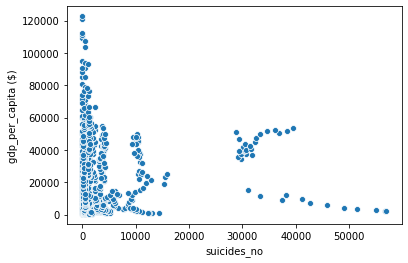

In [41]:
sns.scatterplot(x="suicides_no",y="gdp_per_capita ($)",data=corr)

In [34]:
correlation=corr["suicides_no"].corr(corr["gdp_per_capita ($)"])
correlation

0.07939010528489114

Correlation value between the number of suicides and GDP per capita seems to be very weak so we can not claim there's a positive correlation between these.

Let's analyze randomly selected five countries from the data set to see the correlation of GDP per capita & suicide numbers, age groups and ge

### Analyzing randomly selected countries 

In [44]:
random_countries=corr.sample(n = 5)
random_countries

,country,gdp_per_capita ($),suicides_no
575,Luxembourg,122729,55
397,Guatemala,1867,202
1019,Uruguay,7581,576
334,Finland,41202,994
348,France,44747,10379


### Luxembourg

In [78]:
lux=suicide[suicide["country"]=="Luxembourg"]

In [46]:
corr_lux=lux["suicides_no"].corr(lux["gdp_per_capita ($)"])
corr_lux

-0.07290539584441401

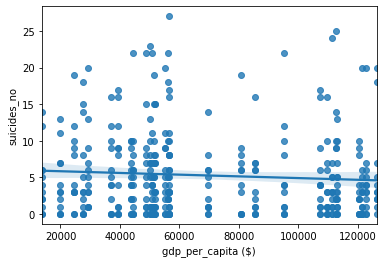

In [49]:
sns.regplot(x="gdp_per_capita ($)",y="suicides_no",data=lux)

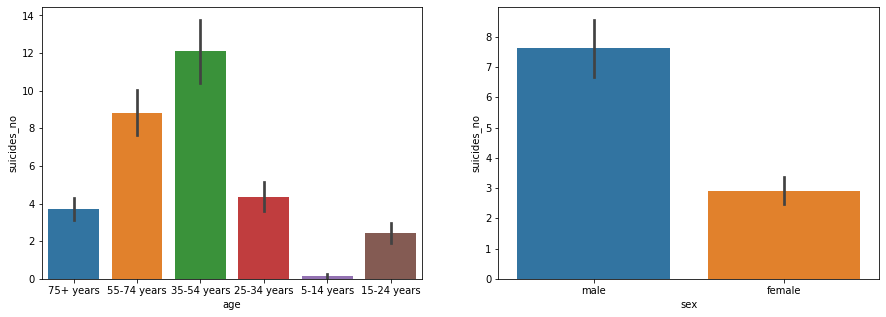

In [66]:
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(121)
sns.barplot(data=lux,x="age",y="suicides_no",ax=ax1)

ax2=fig.add_subplot(122)
sns.barplot(data=lux,x="sex",y="suicides_no",ax=ax2)

### Guatemala

In [62]:
gua=suicide[suicide["country"]=="Guatemala"]
corr_gua=gua["suicides_no"].corr(gua["gdp_per_capita ($)"])
corr_gua

0.3327481877654147

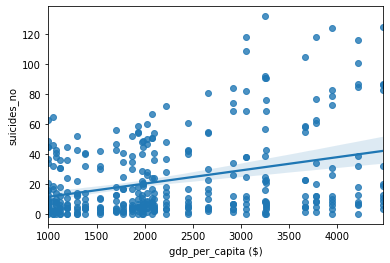

In [64]:
sns.regplot(data=gua,x="gdp_per_capita ($)",y="suicides_no")

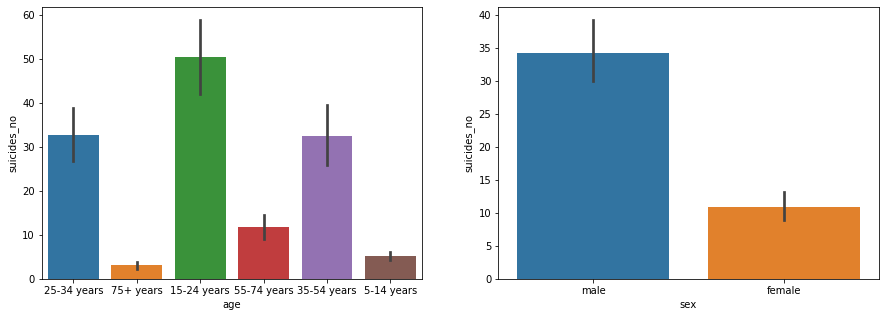

In [65]:
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(121)
sns.barplot(data=gua,x="age",y="suicides_no",ax=ax1)

ax2=fig.add_subplot(122)
sns.barplot(data=gua,x="sex",y="suicides_no",ax=ax2)

### Uruguay

In [80]:
uru=suicide[suicide["country"]=="Uruguay"]

In [75]:
corr_uru=uru["suicides_no"].corr(uru["gdp_per_capita ($)"])
corr_uru

0.17026830542903895

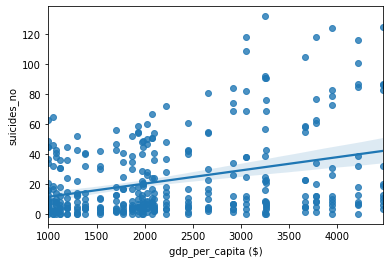

In [76]:
sns.regplot(data=gua,x="gdp_per_capita ($)",y="suicides_no")

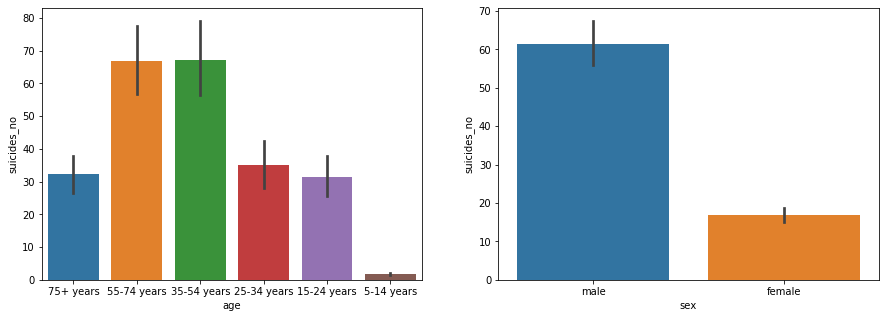

In [77]:
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(121)
sns.barplot(data=uru,x="age",y="suicides_no",ax=ax1)

ax2=fig.add_subplot(122)
sns.barplot(data=uru,x="sex",y="suicides_no",ax=ax2)

### Finland

In [79]:
fin=suicide[suicide["country"]=="Finland"]

In [82]:
corr_fin=fin["suicides_no"].corr(fin["gdp_per_capita ($)"])
corr_fin

-0.1421207038451788

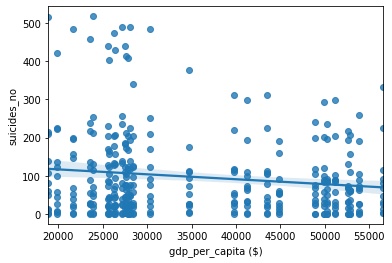

In [83]:
sns.regplot(data=fin,x="gdp_per_capita ($)",y="suicides_no")

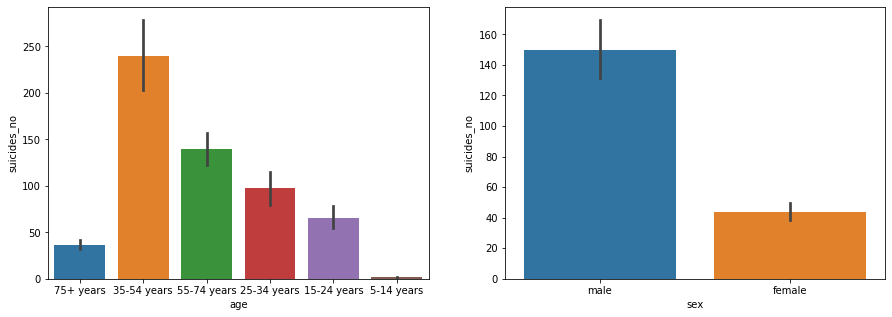

In [84]:
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(121)
sns.barplot(data=fin,x="age",y="suicides_no",ax=ax1)

ax2=fig.add_subplot(122)
sns.barplot(data=fin,x="sex",y="suicides_no",ax=ax2)

### France

In [85]:
fr=suicide[suicide["country"]=="France"]

In [86]:
corr_fin=fin["suicides_no"].corr(fin["gdp_per_capita ($)"])
corr_fin

-0.1421207038451788

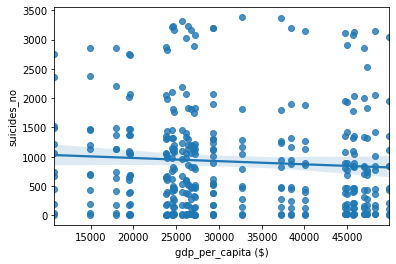

In [87]:
sns.regplot(data=fr,x="gdp_per_capita ($)",y="suicides_no")

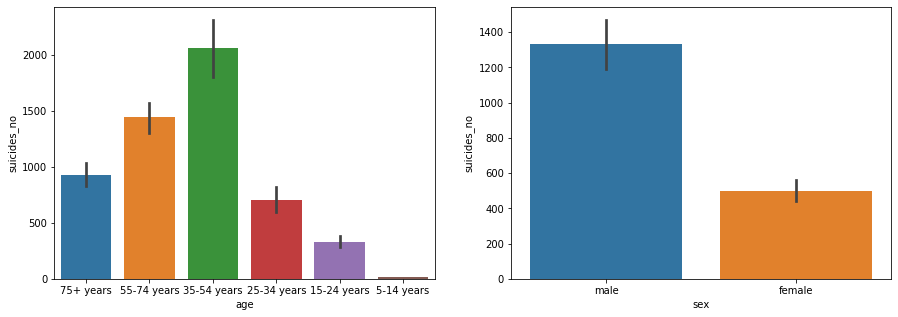

In [95]:
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(121)
sns.barplot(data=fr,x="age",y="suicides_no",ax=ax1)

ax2=fig.add_subplot(122)
sns.barplot(data=fr,x="sex",y="suicides_no",ax=ax2)

## Conclusion

This study shows us that men commit suicide more than women. Suicide number of men is **more than three times higher**, than women's. It also says that in general **people aged 35 to 54 committed suicide more** than other age groups. Regarding to the relationship between GDP & suicide, we reached to the conclusion that there's not any correlation between GDP per capita and suicide numbers in general.  